In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import caiman as cm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")
%load_ext autoreload
%autoreload 2
%matplotlib inline
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)
from utils.video import videoWrite
import moviepy.editor as mpy

## 1. Load data

In [2]:
imgStack = np.load('Data/3D_CW_data/17-08-24-L2-CL-VNC-Raw.npy')
Y = imgStack.copy()
Y = Y.transpose([2, 3, 1, 0]) # x, y, z, T
dx, dy, dz, dt = Y.shape

## 2. Detrend raw signal on pixels

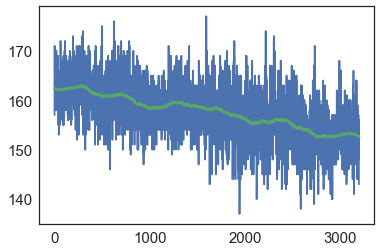

In [3]:
Ysg = np.load('tmpData/Y_sg_CW_VNC.npy')
Y_detr = Y - Ysg

# compare raw pixel and trend
plt.plot(Y[0, 0, 0, :])
plt.plot(Ysg[0, 0, 0, :], linewidth=3)
plt.show()

## 3.Spatial denoising using patched SVD (Greedy algorithm)

### 3.1 Denoising for independent images per stack along z

In [4]:
Y_svd = np.load('tmpData/Y_svd_CW_VNC.npy')
Y_svd_sg = Y_svd + Ysg

#### Performance for selected image

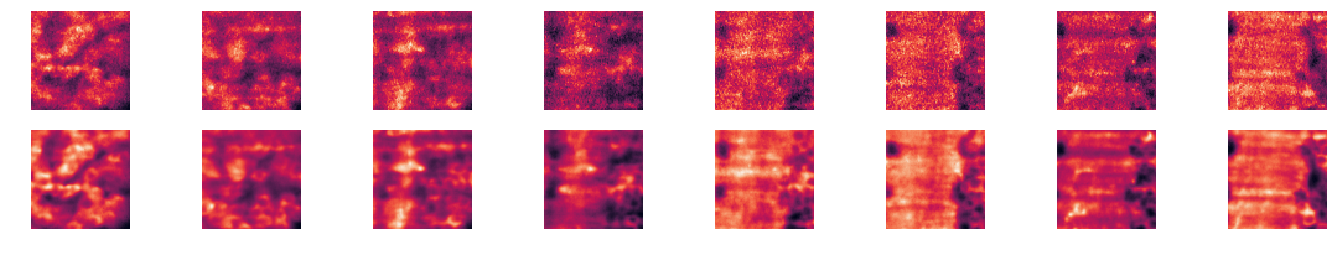

In [5]:
numCol = 8
step = dz//numCol
fig, ax = plt.subplots(2, numCol, figsize=(24, 4))
for nplot in range(numCol):
    ax[0, nplot].imshow(Y[:, :, step*nplot, 810])
    ax[0, nplot].axis('off')
    ax[1, nplot].imshow(Y_svd_sg[:, :, step*nplot, 810])
    ax[1, nplot].axis('off')
plt.show()

#### Performance on single pixels

In [6]:
percentage_noise = ((Y_detr - Y_svd)**2).mean(axis=-1)/Y_detr.var(axis=-1)
print('Average percentage noise removed %f'%(percentage_noise[:].mean()))

Average percentage noise removed 0.810940


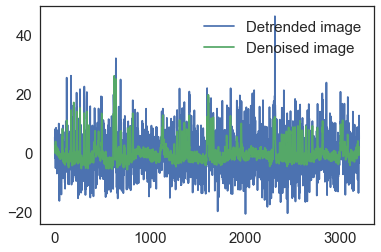

In [7]:
plt.plot(Y_detr[70, 40, 20, :], label='Detrended image')
plt.plot(Y_svd[70, 40, 20, :], label='Denoised image')
plt.legend()
plt.show()

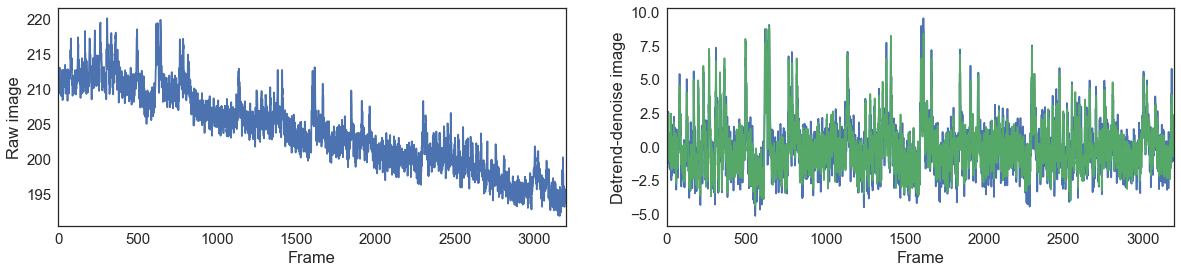

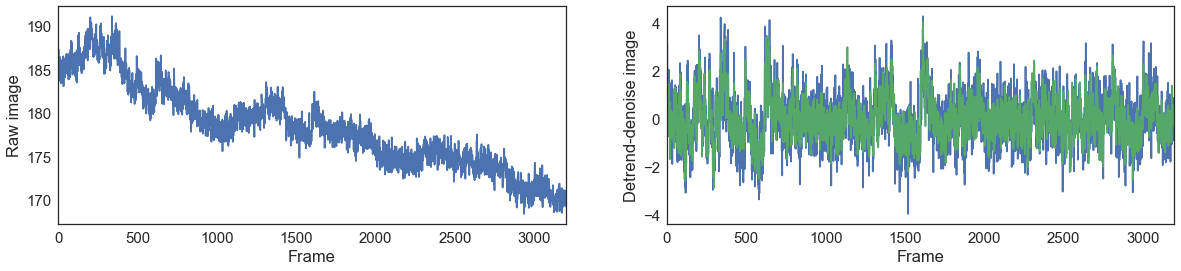

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].plot(Y[0:10, 70:79, step*6, :].mean(axis=0).mean(axis=0))
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Raw image')
ax[0].set_xlim([0, dt])

ax[1].plot(Y_detr[0:10, 70:79, step*6, :].mean(axis=0).mean(axis=0))
ax[1].plot(Y_svd[0:10, 70:79, step*6, :].mean(axis=0).mean(axis=0))
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Detrend-denoise image')
ax[1].set_xlim([0, dt])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
ax[0].plot(Y[70:79, 50:59, step*2, :].mean(axis=0).mean(axis=0))
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Raw image')
ax[0].set_xlim([0, dt])

ax[1].plot(Y_detr[70:79, 50:59, step*2, :].mean(axis=0).mean(axis=0))
ax[1].plot(Y_svd[70:79, 50:59, step*2, :].mean(axis=0).mean(axis=0))
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Detrend-denoise image')
ax[1].set_xlim([0, dt])
plt.show()

In [9]:
# # raw
# numCol = 8
# video_mat_raw = np.empty((numCol*dx, dy, dt))
# step = dz//numCol
# for nDepth in range(numCol):
#     video_mat_raw[nDepth*Y.shape[0]+np.arange(dx), :, :] = Y[:, :, nDepth*step, :]

# # detred
# video_mat_detr = np.empty((numCol*dx, dy, dt))
# step = dz//numCol
# for nDepth in range(numCol):
#     video_mat_detr[nDepth*Y.shape[0]+np.arange(dx), :, :] = Y_detr[:, :, nDepth*step, :]

# # svd
# video_mat_svd = np.empty((numCol*dx, dy, dt))
# step = dz//numCol
# for nDepth in range(numCol):
#     video_mat_svd[nDepth*Y.shape[0]+np.arange(dx), :, :] = Y_svd[:, :, nDepth*step, :]

# video_mat_res = video_mat_detr - video_mat_svd

In [10]:
# video_mat_raw = (video_mat_raw - video_mat_raw.min())/(video_mat_raw.max()-video_mat_raw.min())
# video_mat_detr = (video_mat_detr - video_mat_detr.min())/(video_mat_detr.max() - video_mat_detr.min())
# video_mat_svd = (video_mat_svd - video_mat_svd.min())/(video_mat_svd.max()-video_mat_svd.min())
# video_mat_res = (video_mat_res - video_mat_res.min())/(video_mat_res.max()-video_mat_svd.min())
# video_null = np.zeros((numCol*dx, 16, dt))

# movie = np.concatenate((video_mat_raw, video_null, video_mat_detr, video_null, video_mat_svd, video_null, video_mat_res), axis=1)

In [11]:
# videoWrite(movie.transpose(2, 0, 1), 'movie_CW_VNC.mp4')
# mpy.ipython_display('movie_CW_VNC.mp4', fps=30, loop=False, autoplay=False, maxduration=120)

### 3.2 Denoising for consecutive stacks

In [12]:
Y_cubic_svd = np.load('tmpData/Y_csvd_CW_VNC.npy')
Y_cubic_svd_sg = Y_cubic_svd + Ysg

FileNotFoundError: [Errno 2] No such file or directory: 'tmpData/Y_csvd_CW_VNC.npy'

In [ ]:
plt.plot(Y_detr[70, 40, 20, :], label='Detrended image')
plt.plot(Y_svd[70, 40, 20, :], label='SVD image')
plt.legend()
plt.show()
plt.plot(Y_detr[70, 40, 20, :], label='Detrended image')
plt.plot(Y_cubic_svd[70, 40, 20, :], label='Cubic SVD image')
plt.legend()
plt.show()

In [ ]:
diff = percentage_c_noise - percentage_noise
ind = np.where(diff==diff.max())
plt.plot(Y_detr[ind[0][0], ind[1][0], ind[2][0], :], label='Detrended image')
plt.plot(Y_svd[ind[0][0], ind[1][0], ind[2][0], :], label='SVD image')
plt.legend()
plt.show()
plt.plot(Y_detr[ind[0][0], ind[1][0], ind[2][0], :], label='Detrended image')
plt.plot(Y_cubic_svd[ind[0][0], ind[1][0], ind[2][0], :], label='Cubic SVD image')
plt.legend()
plt.show()